In [1]:
# Assignment 15 sep
# Perform Data preprocessing on Titanic dataset
# 1.Data Collection.
#    Please download the dataset from 
#    https://www.kaggle.com/datasets/yasserh/titanic-dataset
# 2.Data Preprocessing
#     o   Import the Libraries.
#     o   Importing the dataset.
#     o   Checking for Null Values.
#     o   Data Visualization.
#     o   Outlier Detection
#     o   Splitting Dependent and Independent variables
#     o   Perform Encoding
#     o   Feature Scaling.
#     o   Splitting Data into Train and Test

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Import Dataset

In [3]:
dataset = pd.read_csv("C:/Users/Vaibhav Shrivastava/Desktop/ai ml]/tested.csv")

## Calculating Null values

In [4]:
null_values = dataset.isnull().sum()

## Data Visualization

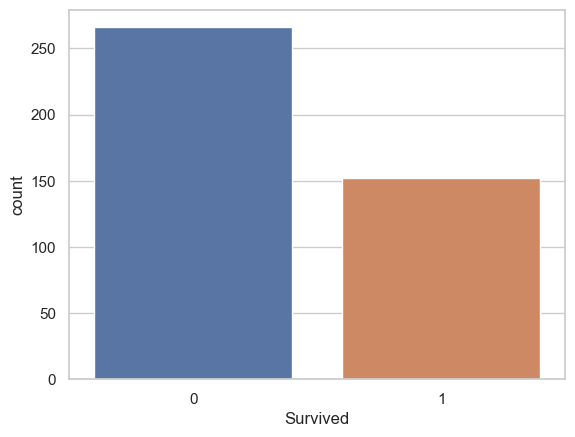

In [5]:
sns.set(style="whitegrid")
sns.countplot(x="Survived", data=dataset)
plt.show()

## Outlier Detection

In [6]:
numerical_columns = ['Age', 'Fare']
z_scores = np.abs((dataset[numerical_columns] - dataset[numerical_columns].mean()) / dataset[numerical_columns].std())
threshold = 3
outlier_mask = z_scores > threshold
outliers = dataset[outlier_mask.any(axis=1)]
print("Outliers detected using Z-score:")
print(outliers)

Outliers detected using Z-score:
     PassengerId  Survived  Pclass  \
24           916         1       1   
53           945         1       1   
59           951         1       1   
64           956         0       1   
69           961         1       1   
74           966         1       1   
75           967         0       1   
81           973         0       1   
96           988         1       1   
114         1006         1       1   
142         1034         0       1   
156         1048         1       1   
184         1076         1       1   
202         1094         0       1   
218         1110         1       1   
324         1216         1       1   
343         1235         1       1   
375         1267         1       1   
407         1299         0       1   

                                                  Name     Sex   Age  SibSp  \
24     Ryerson, Mrs. Arthur Larned (Emily Maria Borie)  female  48.0      1   
53                          Fortune, Miss. Ethel

## Splitting Dependent and Independent Variables

In [8]:
X = dataset.drop("Survived", axis=1)
y = dataset["Survived"]

# Exclude non numeric columns from X

In [9]:
X_numeric = X.select_dtypes(include=[np.number])

# Perform Encoding (Example: Label Encoding for Sex column)

In [10]:
label_encoder = LabelEncoder()
X["Sex"] = label_encoder.fit_transform(X["Sex"])

# Feature Scaling (Example: Standardization)

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Splitting Data into Train and Test

Number of samples in the test dataset: 84
Basic statistics of the test dataset:
Mean: [ 0.00621551 -0.01849392         nan -0.10073345 -0.04805529 -0.09100926]
Standard Deviation: [1.14631322 0.98611637        nan 0.74383342 1.16201349 0.82575941]
Minimum: [-1.72791209 -1.50512029         nan -0.49947002 -0.4002477  -0.50863062]
Maximum: [1.71962474 0.87348191        nan 3.96637954 8.78104409 4.06063358]


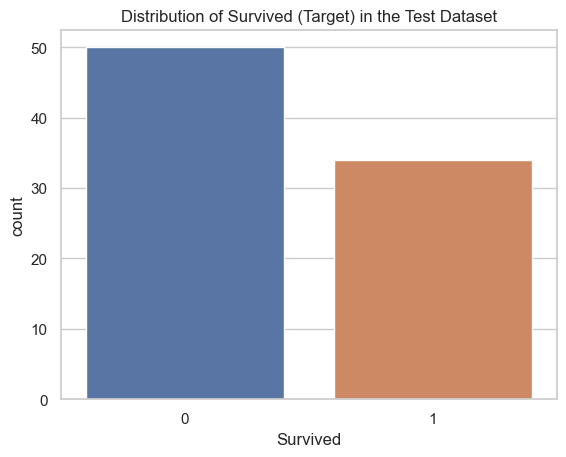

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Number of samples in the test dataset:", len(X_test))
print("Basic statistics of the test dataset:")
print("Mean:", np.mean(X_test, axis=0))
print("Standard Deviation:", np.std(X_test, axis=0))
print("Minimum:", np.min(X_test, axis=0))
print("Maximum:", np.max(X_test, axis=0))
sns.countplot(x=y_test)
plt.title("Distribution of Survived (Target) in the Test Dataset")
plt.show()